## MIE424 (2022 Winter) Lab 2

In this lab, you will be implementing the perceptron algorithm.

### Load Necessary Libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (5,5)

### Generate Dataset

Here we generate 2 dimensional arbitray dataset. $X$ is generated by using `np.random.random` (return random floats in the half-open interval [0.0, 1.0]. Then $Y$ is computed with the assumed true boundary $Xw=0$.

In [2]:
# helper function: generating the data
# n_sample: number of samples to be generated
# w: true decision boundary
def generate_ls_data_2class(n_sample, w):
    X = np.random.random((n_sample, 2))
    Y = np.sign(np.matmul(X,w))
    check = np.sum(Y == 1)*np.sum(Y==-1)
    if check == 0:
        print("w given not valid, exist only 1 class")
        return None
    return X, Y

Since all components in $X$ are between [0,1], to have both classes with the boundary $Xw=0$, we need to have different signs in two componnets of vector $w$.

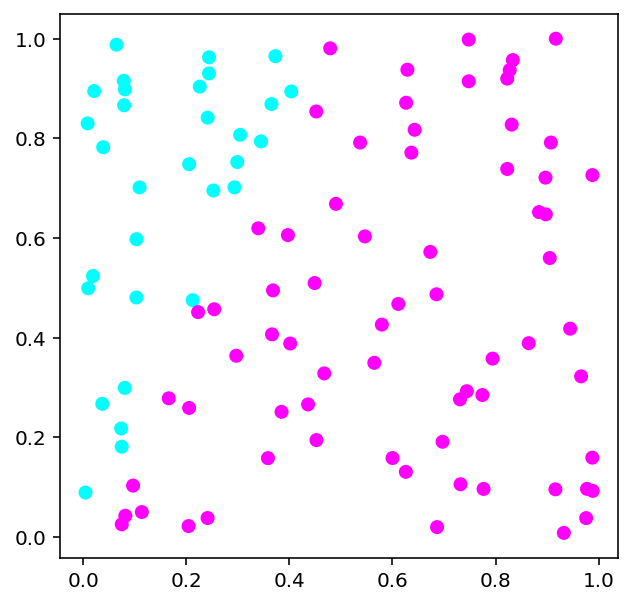

In [3]:
# true value of w used in generating the dataset
w_true = [0.424,-0.2022]

# generating the dataset
np.random.seed(2022)
X, Y = generate_ls_data_2class(100, w_true)

# Create colormap and plot
colors = cm.get_cmap('cool', 2)
plt.scatter(X[:,0],X[:,1], c= colors(Y))
plt.show()

### Construct and Train Preceptron Model

Recall the preceptron model:

We have a set of points $S = \{X_1, X_2, \cdots, X_n\},X_i\in\mathbb{R}^d$. The points are coming as a stream, and each $X_i$ is associated with a label $Y_i$ (1 or −1).

We assume the points are separable, i.e. there exists a linear classifier that can correctly classify all points. We are looking to find this classifier. 

To generalize this and to include an intercept term, we also assume there is a given dimension $(d+1)$ for which $X_{i,d+1} = 1$ for all $i$.

The Algorithm

- Initialization: $w_0$ = 0
- for each point X
    - if $X w_k>0$ predict $y_j =1$ else predict $y_j =−1$ 
    - if we make a mistake
        - if true label is +1 update $w_{k+1} = w_k + X$
        - if true label is −1 update $w_{k+1} = w_k- X$

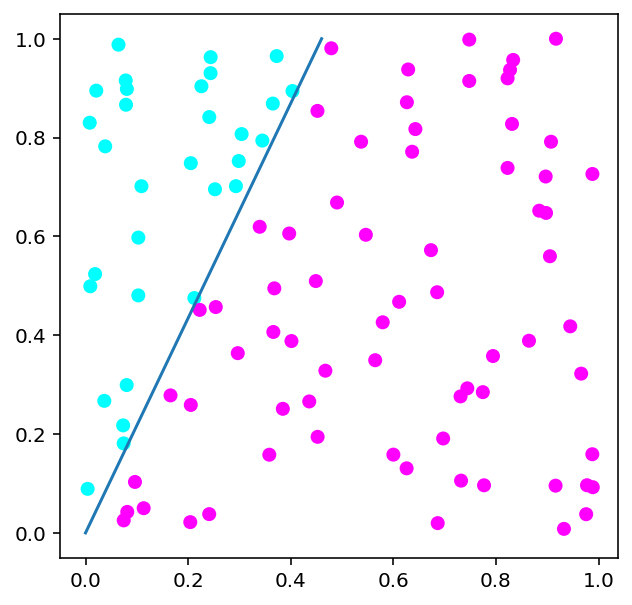

In [18]:
class Perceptron:
    
    def __init__(self, iterations):
        self.w = np.zeros((2,1))
        self.iterations = iterations
    
    def train(self, X, Y, lr=1, plot=False):
        for i in range(self.iterations):
            # Insert your code here
            # Update w using the preceptron algorithm:
            # Hint: you can use self.w to access the value of w            
            for x_val,y_val in zip(X,Y):
                if self.predict(x_val) != y_val:
                    self.w += lr*(y_val*x_val).reshape(-1, 1)
                    break;
            
            
            
            if plot:
                plt.figure(i)
                plt.scatter(X[:,0],X[:,1], c= colors(Y))
                slope = -1 * self.w[0] / self.w[1]
                plt.plot([0, 1/slope],[0, 1])
                plt.show()
            if self.err(X, Y) == 0:
                self.conv_iter = i+1
                break
        
    def predict(self, X):
        # Insert your code here
        # return the prediction of X (n by 2 array) made by the fitted model
        # Hint: you can use self.w to access the value of w
        return np.sign(np.dot(X, self.w))
    
    def err(self, X, Y):
        # Insert your code here
        # return percentage of samples where the prediction made by the fitted model are not correct
        # Hint: you can use self.w to access the value of w
        return np.count_nonzero(self.predict(X).reshape(-1)-Y)/len(Y)

p = Perceptron(100)
p.train(X, Y)

plt.scatter(X[:,0],X[:,1], c= colors(Y))

colors_2 = cm.get_cmap('binary', 20)

slope = -1 * p.w[0, 0] / p.w[1, 0]
plt.plot([0, 1/slope],[0, 1])
plt.show()

In [5]:
# Examine the training error
p.err(X, Y)

0.0

### Exercise:

How does changing the learning rate affect how long it takes for the perceptron algorithm to converge?

How does changing the order at which the perceptron algorithm sees the data points affect the convergence time?

In [19]:
# Insert your code here

lrs= [0.1,0.5,1,5,10]

for lr in lrs:
    p = Perceptron(1000)
    p.train(X, Y,lr=lr)
    print(p.conv_iter)
    
# In the lab, it was 4 because we printed i instead of i+1, but python starts iterating at 0 instead of 1, so the real answer is 5.




5
5
5
5
5


In [20]:
    
for i in range(10):
    arr = np.arange(len(Y))
    np.random.shuffle(arr)
    Xnew,Ynew = X[arr],Y[arr]
    p = Perceptron(1000)
    p.train(Xnew, Ynew)
    print(p.conv_iter)

15
21
30
20
73
21
32
30
131
9


### Discussion: Preceptron Model with Intercept

Now we consider the boundary between two classes to be $Xw+b=0$ where $b$ is the bias term.

We use the idea discussed in the lecture to expand $X$ to add a given dimension $(d+1)$ for which $X_{i,d+1} = 1$ for all $i$.

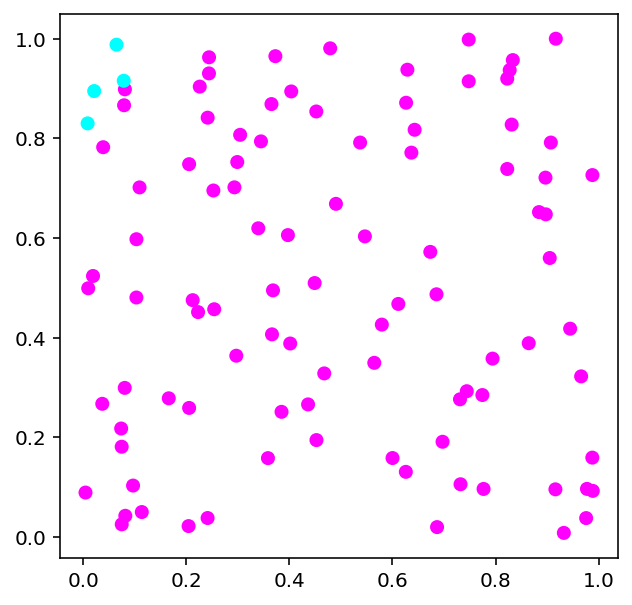

In [21]:
# Generate dataset (Expanding X and update Y)

# true value of w and b used in generating the dataset
b_true = 0.15
w_true_expand = np.zeros(len(w_true)+1)
w_true_expand[0:len(w_true)] = w_true
w_true_expand[-1] = b_true

# W = [w0, w1, b]
# X = [X, 1]

# expand X
X_expand = np.ones((X.shape[0],X.shape[1]+1))
X_expand[:,0:2]=X

# update Y
Y_update = np.sign(np.matmul(X_expand,w_true_expand))

colors = cm.get_cmap('cool', 2)
plt.scatter(X[:,0],X[:,1], c= colors(Y_update))
plt.show()

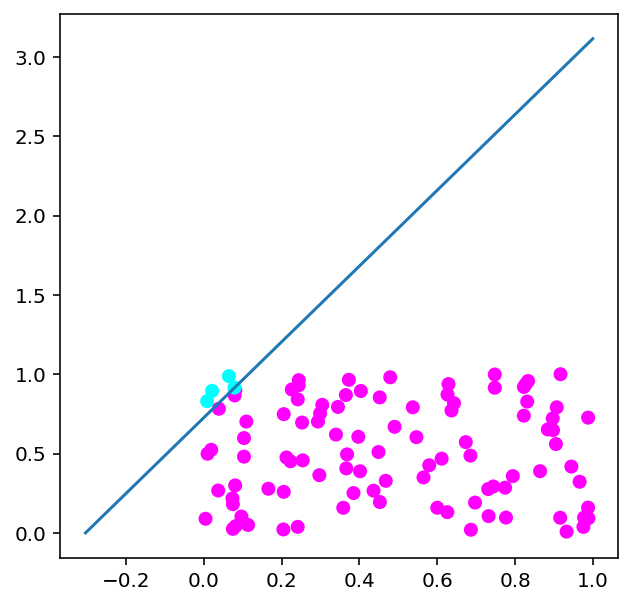

In [22]:
class PerceptronIntercept(Perceptron):
    
    def __init__(self, iterations):
        self.w = np.zeros((3,1))
        self.iterations = iterations
    
    def train(self, X, Y, lr=1, plot=False):
        for i in range(self.iterations):
            # Insert your code here
            # Update w using the preceptron algorithm:
            # Hint: you can use self.w to access the value of w     
            for x_val,y_val in zip(X,Y):
                if self.predict(x_val) != y_val:
                    self.w += lr*(y_val*x_val).reshape(-1, 1)
                    break;
            
            
            
            
            if plot:
                plt.figure(i)
                plt.scatter(X[:,0],X[:,1], c= colors(Y))
                plt.plot([-w[2, 0]/w[0, 0], 1],[0, -(w[0, 0]+w[2, 0])/ w[1, 0]])
                plt.show()
            if self.err(X, Y) == 0:
                break
                self.conv_iter = i+1
                
    def predict(self, X):
        return(np.sign(np.dot(X, self.w)))
    
    def err(self, X, Y):
        return(np.count_nonzero(self.predict(X).reshape(-1)-Y)/len(Y))
    

p = PerceptronIntercept(1500)
p.train(X_expand, Y_update)

plt.scatter(X_expand[:,0],X_expand[:,1], c= colors(Y_update))

colors_2 = cm.get_cmap('binary', 20)

w = p.w/np.linalg.norm(p.w)

plt.plot([-w[2, 0]/w[0, 0], 1],[0, -(w[0, 0]+w[2, 0])/ w[1, 0]])
plt.show()


In [11]:
# Examine the training error
p.err(X_expand, Y_update)

0.0